In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string

In [2]:
client = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db = client.ad_database
collection = db.new_ad_collection

In [3]:
data = []
for x in collection.find({}):
    data.append(x)

In [4]:
df = pd.DataFrame(data)
df.head()

,_id,brand,country,description,headline,img_url,indsutry,industry,medium,url
0,5cf6c6647f233834c8a841b3,Enable Foundation,NaN,“Surreal is real in dementia” is an awareness ...,NaN,http://www.welovead.com/upload/photo_db/2019/0...,NaN,Public interest & Non-profit,Ambient & Interactive,http://www.welovead.com/en/works/details/e70wh...
1,5cf6c6657f233834c8a841b4,Tzabar,Israel,NaN,Roger Waters Live in Paris 3 nights + concert ...,http://www.welovead.com/upload/photo_db/2011/0...,NaN,Transport & Tourism,Print,http://www.welovead.com/en/works/details/67bCesqz
2,5cf6c6667f233834c8a841b5,Union Insurance Company,Slovakia,NaN,NaN,http://www.welovead.com/upload/photo_db/2010/0...,NaN,Financial & Legal services,Ambient & Interactive,http://www.welovead.com/en/works/details/ff3Bkqvz
3,5cf6c6677f233834c8a841b6,Infiniti,United States,NaN,Accelerating the future.,http://www.welovead.com/upload/photo_db/2009/0...,NaN,Automotive & Services,Print,http://www.welovead.com/en/works/details/0c7ygstC
4,5cf6c6687f233834c8a841b7,Guinness,United Kingdom,NaN,NaN,http://www.welovead.com/upload/photo_db/2009/0...,NaN,Alcoholic drinks,Outdoor,http://www.welovead.com/en/works/details/528xlpvC


In [5]:
df = df.drop(['_id', 'img_url', 'url', 'indsutry'], axis=1)

In [6]:
len(df[(df.headline.isnull()) & (df.description.isnull())])

57441

In [7]:
df.isnull().sum()

brand           19346
country         13690
description    104351
headline        90224
industry           36
medium           3945
dtype: int64

In [8]:
new = df.dropna(subset=['description', 'headline'], how='all')

In [9]:
new.head()

,brand,country,description,headline,industry,medium
0,Enable Foundation,NaN,“Surreal is real in dementia” is an awareness ...,NaN,Public interest & Non-profit,Ambient & Interactive
1,Tzabar,Israel,NaN,Roger Waters Live in Paris 3 nights + concert ...,Transport & Tourism,Print
3,Infiniti,United States,NaN,Accelerating the future.,Automotive & Services,Print
5,Toyota,Canada,NaN,Official ride of the Spinfest Amateur DJ Awards.,Automotive & Services,Print
10,Friends of the Earth,Germany,NaN,Travelling fruits cause pollution. Think globa...,Public interest & Non-profit,Print


In [10]:
new[(new.headline.isnull()) & (new.description.isnull())]

,brand,country,description,headline,industry,medium


In [11]:
len(new)

89415

In [12]:
new = new[['brand', 'country', 'medium', 'headline', 'description', 'industry']]
new = new.reset_index(drop=True)
new.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,“Surreal is real in dementia” is an awareness ...,Public interest & Non-profit
1,Tzabar,Israel,Print,Roger Waters Live in Paris 3 nights + concert ...,NaN,Transport & Tourism
2,Infiniti,United States,Print,Accelerating the future.,NaN,Automotive & Services
3,Toyota,Canada,Print,Official ride of the Spinfest Amateur DJ Awards.,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,Travelling fruits cause pollution. Think globa...,NaN,Public interest & Non-profit


In [13]:
new.headline = new.headline.str.lower()
new.description = new.description.str.lower()

In [20]:
new.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,surreal is real in dementia is an awareness ca...,Public interest & Non-profit
1,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,NaN,Transport & Tourism
2,Infiniti,United States,Print,accelerating the future,NaN,Automotive & Services
3,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,NaN,Public interest & Non-profit


In [15]:
new.description = new.description.str.replace('[{}]'.format(string.punctuation), '')
new.headline = new.headline.str.replace('[{}]'.format(string.punctuation), '')

In [17]:
new[new.headline.str.contains('“', na=False)]

,brand,country,medium,headline,description,industry
876,Harley-Davidson,Australia,Print,welcome to the harley book club the 2014 genui...,harleydavidson has created a book club with a ...,Automotive & Services
946,MLK Dream Weekend,NaN,Print,fortyfive years ago the world had plenty of na...,NaN,Public interest & Non-profit
1214,Audrey 2,South Africa,Print,theres a few hiding in your cabinet others are...,some ideaswork never see the light of day so t...,Corporate self-promo
1225,CREE,NaN,TV & Cinema,reddick holding a 100 bill “let’s assume this ...,spokesperson lance reddick “fringe” “the wire”...,Electronics & Audio-Visual
1586,Levi's,"Hong Kong, China",Print,“unbuttoned” the magazine is a “mini 501” made...,NaN,"Apparel, Clothing & Footwear"
1764,Stanfield's,Canada,Cyber,stanfield’s ltd is a small 150 yearold underwe...,NaN,"Apparel, Clothing & Footwear"
1827,ElephantJournal.com,United States,TV & Cinema,dad to daughter at birthday party “so what’d y...,yogaspirituality magazine elephant journal ima...,Transport & Tourism
2148,NaN,NaN,Print,use the old one in cantonese “brain” sounds si...,NaN,Student works
2345,Goo Gone,United States,TV & Cinema,“hey did you hear the one about the bundt cake...,oven tries out his justthissideofpg dirty joke...,"House, Garden & Pets"
2669,Fat Tire Ale,United States,Cyber,vo “how to expand your social network” a glass...,new belgium brewing—environmentally proactive ...,Alcoholic drinks


In [18]:
new.description = new.description.str.replace('“', '').str.replace('”', '')
new.headline = new.headline.str.replace('“', '').str.replace('”', '')

In [19]:
len(new)

89415

In [26]:
new[new.duplicated(subset=['headline', 'description'])]

,brand,country,medium,headline,description,industry
259,T-Mobile,Slovakia,Print,it sucks when you miss the beginning with magi...,NaN,Media & Publishing
275,SALT,NaN,Design & Branding,NaN,commissioned to work with salt research collec...,Electronics & Audio-Visual
418,Süddeutsche Zeitung,NaN,Design & Branding,NaN,the first edition of the süddeutsche zeitung m...,Media & Publishing
463,www.niceshop.com,Ecuador,Print,schedule your purchase now we accept all credi...,NaN,Electronics & Audio-Visual
555,KIA,Honduras,Print,change your ways buy a kia,NaN,Automotive & Services
651,French Federation of Cardiology,France,TV & Cinema,NaN,briefexplanation this film is actually a capt...,Pharmaceutical
695,Metro Dairy,India,Print,cool it,dont fight enjoy metro ice cream instead,Confectionery & Snacks
719,Schlagmann-Edmüller Stiftung,Germany,Direct Market,NaN,the bricklayers calendar introduces the strong...,Industrial & Agricultural
723,RSPCA,Australia,Print,pets arent toys please think before you buy yo...,NaN,Public interest & Non-profit
741,NaN,Czech Republic,Print,apply your french lessons to the most french p...,NaN,Education


In [27]:
final = new.drop_duplicates(subset=['headline', 'description'])

In [32]:
new[new.headline.str.contains('goodbye clay', na=False)]

,brand,country,medium,headline,description,industry
17578,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing
89387,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing


In [33]:
final[final.headline.str.contains('goodbye clay', na=False)]

,brand,country,medium,headline,description,industry
17578,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing


In [34]:
final.isnull().sum()

brand           6249
country         3297
medium           740
headline       13623
description    21554
industry           3
dtype: int64

In [37]:
final = final.dropna(subset=['industry'])

In [38]:
len(final)

39941

In [39]:
final.brand.nunique()

13401

In [40]:
final.country.nunique()

207

In [41]:
final.industry.value_counts()

Public interest & Non-profit               5783
Automotive & Services                      3395
Media & Publishing                         2615
Professional  & Public services            2514
Culture, Recreation & Sport                2373
House, Garden & Pets                       2282
Electronics & Audio-Visual                 2015
Food                                       1633
Apparel, Clothing & Footwear               1607
Beauty & Health                            1497
Alcoholic drinks                           1270
Retail & Distribution                      1256
Transport & Tourism                        1241
Financial & Legal services                 1222
Non-alcoholic drinks                       1140
Pharmaceutical                              922
Confectionery & Snacks                      749
Corporate self-promo                        713
Internet sites & Services                   602
Education                                   600
Toys & Games                            

In [43]:
industries = list((final.industry.value_counts().index))[:28]

In [44]:
final = final[final.industry.isin(industries)].reset_index(drop=True)

In [45]:
final.industry.value_counts()

Public interest & Non-profit       5783
Automotive & Services              3395
Media & Publishing                 2615
Professional  & Public services    2514
Culture, Recreation & Sport        2373
House, Garden & Pets               2282
Electronics & Audio-Visual         2015
Food                               1633
Apparel, Clothing & Footwear       1607
Beauty & Health                    1497
Alcoholic drinks                   1270
Retail & Distribution              1256
Transport & Tourism                1241
Financial & Legal services         1222
Non-alcoholic drinks               1140
Pharmaceutical                      922
Confectionery & Snacks              749
Corporate self-promo                713
Internet sites & Services           602
Education                           600
Toys & Games                        533
Industrial & Agricultural           512
Miscellaneous                       454
Catering industry                   383
Personal accessories                325


In [46]:
len(final)

38133

In [47]:
list(final.country.unique())

[nan,
 'Israel',
 'United States',
 'Canada',
 'Germany',
 'Colombia',
 'France',
 'Denmark',
 'United Kingdom',
 'Japan',
 'Brazil',
 'India',
 'Spain',
 'Nigeria',
 'Paraguay',
 'Australia',
 'United Arab Emirates',
 'Portugal',
 'Italy',
 'Switzerland',
 'Turkey',
 'Hong Kong, China',
 'Taipei, China',
 'Argentina',
 'China',
 'South Africa',
 'Peru',
 'Thailand',
 'Sweden',
 'Singapore',
 'Poland',
 'Chile',
 'Czech Republic',
 'Austria',
 'Netherlands',
 'Ecuador',
 'Hungary',
 'Belgium',
 'Toronto, Canada',
 'Russia',
 'Croatia',
 'Romania',
 'Lithuania',
 'Isle of Man',
 'Finland',
 'Puerto Rico',
 'Slovakia',
 'Shanghai, China',
 'Bolivia',
 'Honduras',
 'El Salvador',
 'Philippines',
 'New Zealand',
 'Ukraine',
 'Greece',
 'Egypt',
 'Kenya',
 'Latvia',
 'Mozambique',
 'Norway',
 'Indonesia',
 'Estonia',
 'Ankara, Turkey',
 'Malaysia',
 'Montreal, Canada',
 'Angola',
 'Iran',
 'Saudi Arabia',
 'Jordan',
 'Rio de Janeiro, Brazil',
 'Ireland',
 'South Korea',
 'Mexico',
 'Buenos 

In [48]:
final.loc[final.country.str.contains(',', na=False), 'country']

55                  Hong Kong, China
60                     Taipei, China
79                  Hong Kong, China
95                     Taipei, China
107                 Hong Kong, China
109                    Taipei, China
140                 Hong Kong, China
154                  Toronto, Canada
188                 Hong Kong, China
212                 Hong Kong, China
238                  Shanghai, China
255                 Hong Kong, China
332                 Hong Kong, China
337                 Hong Kong, China
385                    Taipei, China
429                   Ankara, Turkey
452                 Hong Kong, China
454                 Hong Kong, China
464                 Montreal, Canada
483                 Hong Kong, China
550                 Hong Kong, China
597                    Taipei, China
638           Rio de Janeiro, Brazil
639                 Hong Kong, China
667                    Taipei, China
698                 Hong Kong, China
719          Buenos Aires, Argentina
7

In [49]:
x = 'Taipei, China'
x.split(',')[1].strip()

'China'

In [50]:
final.loc[final.country == 'Taipei, China', 'country'] = 'Taiwan'

In [51]:
len(final.loc[final.country == 'Taiwan'])

394

In [53]:
cities = final.loc[final.country.str.contains(',', na=False), 'country']
cleaned = []
for city in cities:
    city = city.split(',')[1].strip()
    cleaned.append(city)
indeces = list(cities.index)

In [56]:
cleaned_countries=pd.Series(cleaned, index=indeces)

In [57]:
cleaned_countries.head()

55      China
79      China
107     China
140     China
154    Canada
dtype: object

In [57]:
final.loc[final.country.str.contains(',', na=False), 'country'] = cleaned_countries

In [58]:
final.loc[final.country.str.contains(',', na=False), 'country']

Series([], Name: country, dtype: object)

In [59]:
for c in final.country.unique():
    print(c)

nan
Israel
United States
Canada
Germany
Colombia
France
Denmark
United Kingdom
Japan
Brazil
India
Spain
Nigeria
Paraguay
Australia
United Arab Emirates
Portugal
Italy
Switzerland
Turkey
China
Taiwan
Argentina
South Africa
Peru
Thailand
Sweden
Singapore
Poland
Chile
Czech Republic
Austria
Netherlands
Ecuador
Hungary
Belgium
Russia
Croatia
Romania
Lithuania
Isle of Man
Finland
Puerto Rico
Slovakia
Bolivia
Honduras
El Salvador
Philippines
New Zealand
Ukraine
Greece
Egypt
Kenya
Latvia
Mozambique
Norway
Indonesia
Estonia
Malaysia
Angola
Iran
Saudi Arabia
Jordan
Ireland
South Korea
Mexico
Panama
Venezuela
Vietnam
Costa Rica
Bulgaria
Kazakhstan
Serbia
Guatemala
Cyprus
Kyrgyzstan
Luxembourg
Uruguay
Oman
Bangladesh
Tunisia
Lebanon
Belize
Macedonia
Slovenia
Mauritius
Pakistan
Morocco
Moldova
Iceland
Kuwait
Uganda
Trinidad and Tobago
Belarus
Sri Lanka
Dominican Republic
Swaziland
Bahrain
Qatar
Nicaragua
Azerbaijan
Georgia
Dominica
Réunion
Bahamas
Namibia
Algeria
Armenia
Albania
Gabon
Jamaica
Sene

In [60]:
final.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,surreal is real in dementia is an awareness ca...,Public interest & Non-profit
1,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,NaN,Transport & Tourism
2,Infiniti,United States,Print,accelerating the future,NaN,Automotive & Services
3,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,NaN,Public interest & Non-profit


In [61]:
final.medium.value_counts()

Print                    21138
TV & Cinema               6012
Cyber                     2698
Outdoor                   2429
Design & Branding         1658
Ambient & Interactive     1557
Promotion & Event         1224
Direct Market              895
Radio                      364
Miscellaneous               78
Name: medium, dtype: int64

In [62]:
final.isnull().sum()

brand           5536
country         3075
medium            80
headline       12941
description    20525
industry           0
dtype: int64

In [63]:
final.tail()

,brand,country,medium,headline,description,industry
38128,RSPCA,Australia,Print,animal cruelty shows itself in many ways nearl...,NaN,Public interest & Non-profit
38129,Maxploys,Thailand,Print,wanna cross maxploys crossword competition ca...,NaN,"Culture, Recreation & Sport"
38130,Volkswagen,Brazil,Print,dont use your phone while driving,NaN,Automotive & Services
38131,World Wildlife Fund (WWF),Malaysia,Miscellaneous,NaN,an ice sculpture of a turtle melts over a peri...,Public interest & Non-profit
38132,Kaiser,Brazil,TV & Cinema,NaN,description synopsis spot with great specia...,Alcoholic drinks


In [64]:
final.to_csv('cleaned_ads_data.csv', index=False)

In [65]:
top_countries = final.country.value_counts().head(25)

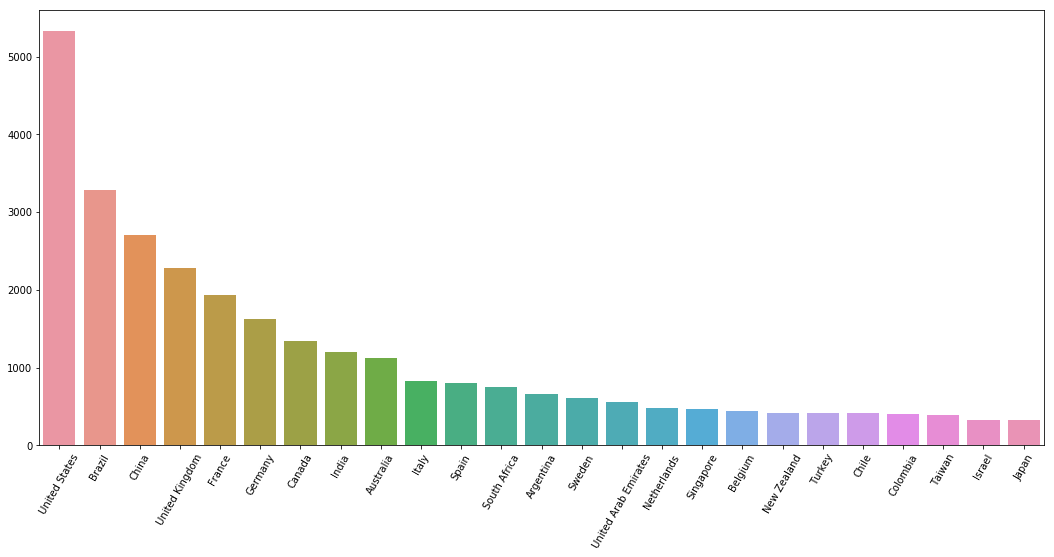

In [66]:
plt.figure(figsize=(18,8))
x = sns.barplot(top_countries.index, top_countries.values)
x.set_xticklabels(rotation=60, labels=top_countries.index);

In [67]:
top_brands = final.brand.value_counts(ascending=False).head(25)
top_brands.index

Index(['Volkswagen', 'McDonald's', 'Nike', 'World Wildlife Fund (WWF)',
       'Amnesty International', 'Mercedes-Benz', 'IKEA', 'Samsung', 'Audi',
       'Toyota', 'Honda', 'Coca-Cola', 'Ford', 'Google', 'Sony', 'Nissan',
       'adidas', 'Heineken', 'Burger King', 'Fiat', 'Greenpeace', 'Renault',
       'BMW', 'Red Cross', 'Axe/Lynx'],
      dtype='object')

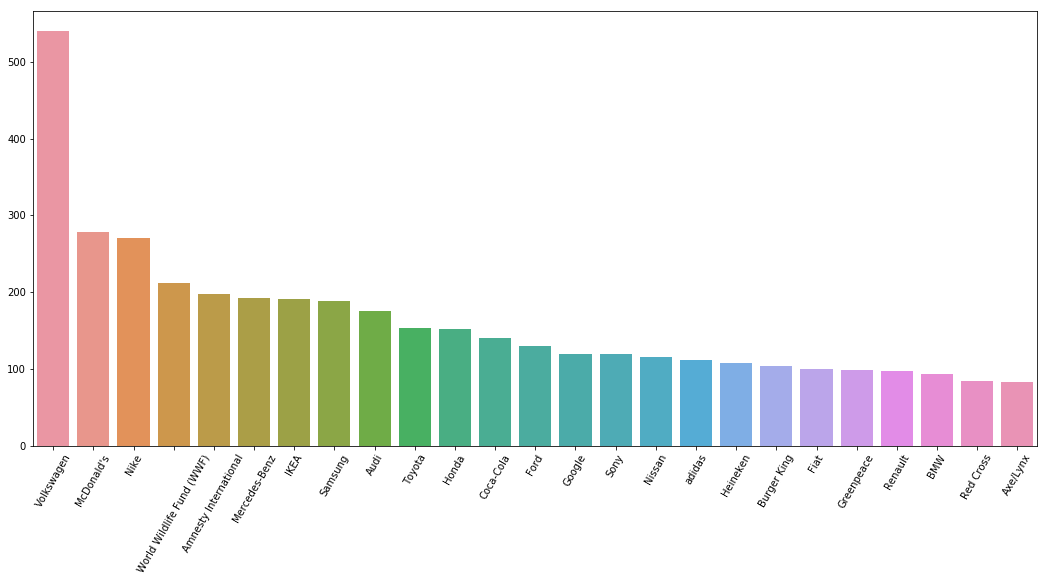

In [68]:
plt.figure(figsize=(18,8))
x = sns.barplot(top_brands.index, top_brands.values)
x.set_xticklabels(rotation=60, labels=top_brands.index);

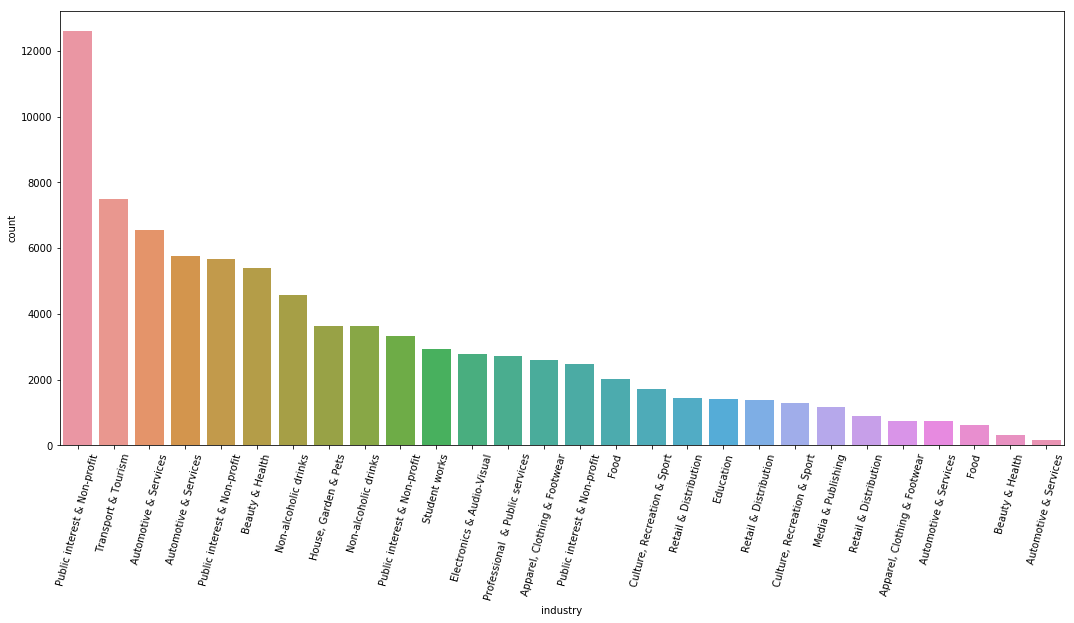

In [170]:
plt.figure(figsize=(18,8))
x = sns.countplot(new.industry, order=new.industry.value_counts().index)
x.set_xticklabels(rotation=75, labels=new.industry);

In [70]:
from sklearn import feature_extraction

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
headlines = final[['headline', 'industry']]
headlines = headlines.dropna()
len(headlines)

25192

In [71]:
X = headlines.headline
y = headlines.industry

In [72]:
cv = CountVectorizer(stop_words = 'english')
counts = cv.fit_transform(X)
cv.vocabulary_

{'roger': 21180,
 'waters': 26987,
 'live': 15000,
 'paris': 18237,
 'nights': 17169,
 'concert': 6229,
 '699': 1138,
 'monday': 16452,
 '30': 750,
 '2011': 547,
 'accelerating': 1489,
 'future': 10777,
 'official': 17590,
 'ride': 21019,
 'spinfest': 23240,
 'amateur': 2150,
 'dj': 8044,
 'awards': 3014,
 'travelling': 25467,
 'fruits': 10667,
 'cause': 5039,
 'pollution': 19088,
 'think': 24904,
 'global': 11146,
 'eat': 8537,
 'local': 15050,
 'art': 2669,
 'beauty': 3415,
 'makes': 15471,
 'taste': 24541,
 'like': 14880,
 'friday': 10599,
 'seatbelt': 21893,
 'excuse': 9345,
 'fun': 10721,
 'officially': 17591,
 'licensed': 14813,
 'gala': 10808,
 'poster': 19216,
 'games': 10837,
 'xxi': 27966,
 'lotusiad': 15166,
 'soft': 22932,
 'new': 17095,
 'strong': 23777,
 'smoking': 22825,
 'garbage': 10854,
 'dump': 8412,
 'worst': 27509,
 'toxic': 25328,
 'products': 19572,
 'sound': 23073,
 'good': 11228,
 'look': 15122,
 'jacks': 13683,
 'paint': 18099,
 'numbers': 17416,
 'making': 15

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = stopwords.words('english')
stop_words += ['1','2','3','4','5','6','7','8','9','0']
tokens = X.apply(lambda x: word_tokenize(x))

In [102]:
stopped = tokens.apply(lambda x: [word for word in tokens if word not in stop_words])

KeyboardInterrupt: 

In [103]:
X.ravel()

array(['roger waters live in paris 3 nights  concert €699 monday 30 may 2011',
       'accelerating the future',
       'official ride of the spinfest amateur dj awards', ...,
       'animal cruelty shows itself in many ways nearly 20 of abused children in turn abuse animals thats why when an rspca inspector discovers a child is responsible for an act of animal cruelty they know it may not only be the pet that needs help often by alerting welfare organisations our inspectors have helped prevent not just animal abuse but child abuse',
       'wanna cross  maxploys crossword competition calling for 2019 entires',
       'dont use your phone while driving'], dtype=object)

In [90]:
from collections import Counter
Counter("".join(X).split()).most_common(100)

[('the', 14871),
 ('to', 8075),
 ('a', 7758),
 ('of', 6574),
 ('you', 5413),
 ('and', 4926),
 ('in', 4424),
 ('your', 4419),
 ('is', 4400),
 ('for', 3697),
 ('with', 2657),
 ('it', 2448),
 ('on', 2063),
 ('are', 1887),
 ('that', 1784),
 ('be', 1719),
 ('at', 1556),
 ('can', 1545),
 ('from', 1376),
 ('we', 1370),
 ('not', 1284),
 ('more', 1263),
 ('this', 1256),
 ('have', 1251),
 ('new', 1114),
 ('all', 1048),
 ('by', 1045),
 ('as', 990),
 ('its', 974),
 ('will', 950),
 ('our', 943),
 ('one', 925),
 ('an', 864),
 ('like', 809),
 ('get', 789),
 ('i', 769),
 ('when', 765),
 ('up', 749),
 ('out', 745),
 ('but', 736),
 ('only', 731),
 ('no', 716),
 ('just', 712),
 ('dont', 706),
 ('what', 705),
 ('do', 699),
 ('world', 684),
 ('if', 682),
 ('or', 671),
 ('every', 657),
 ('they', 643),
 ('has', 642),
 ('so', 633),
 ('than', 633),
 ('their', 630),
 ('make', 627),
 ('time', 621),
 ('people', 620),
 ('life', 619),
 ('his', 604),
 ('who', 589),
 ('help', 588),
 ('now', 585),
 ('about', 564),
 ('

In [76]:
counts.toarray().sum(axis=0)

array([ 2, 13,  2, ...,  1,  1,  1], dtype=int64)

In [186]:
X.sample()

1944    Pharex Carbocisteine Cough Syrup
Name: headline, dtype: object

In [199]:
new[new.headline.str.contains('699', na=False)]

,brand,country,medium,headline,description,industry
1,Tzabar,Israel,Print,Roger Waters Live in Paris 3 nights + concert ...,NaN,Transport & Tourism
15195,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
17988,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
32224,Tzabar,Israel,Print,Roger Waters Live in Paris 3 nights + concert ...,NaN,Transport & Tourism
40899,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
45978,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
71471,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
82319,NaN,Philippines,Print,Unlimited talktime P699 a month.,NaN,Professional & Public services
82518,Tzabar,Israel,Print,Roger Waters Live in Paris 3 nights + concert ...,NaN,Transport & Tourism


In [191]:
len(new.drop_duplicates())

39378